In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (8, 5)

In [5]:
df=pd.read_csv('D:\Karishma\Data analysis classes\python\datasets\cleanedrsw_amazon_sales.csv')
df

,Order_ID,Order_Date,Region,Product_Category,Product_Name,Quantity,Unit_Price,Discount,Revenue,Cost,Profit
0,ORD101084,2023-03-01 00:00:00,North America,Home,Blender,100,454.32,0.10,NaN,51730.14,NaN
1,ORD108018,2023-03-09 00:00:00,Europe,Toys,Doll,1,143.51,0.00,143.5100,143.02,0.4900
2,ORD104865,2023-05-10 00:00:00,North America,Books,Sci-Fi,50,238.72,0.10,NaN,9825.43,NaN
3,ORD101573,2023-02-02 00:00:00,Europe,Home,Lamp,1,392.44,0.10,NaN,321.11,NaN
4,ORD107094,2023-11-02 00:00:00,Europe,Clothing,Jeans,50,145.53,0.20,5821.2000,5915.05,-93.8500
...,...,...,...,...,...,...,...,...,...,...,...
5677,ORD110537,2023-09-07 00:00:00,Asia,Electronics,Headphones,3,485.51,0.05,1383.7035,1222.40,161.3035
5678,ORD102305,2023-09-07 00:00:00,Europe,Clothing,Jacket,1,71.95,0.30,50.3650,85.86,-35.4950
5679,ORD103924,2023-08-12 00:00:00,Europe,Books,Biography,2,268.15,0.20,429.0400,395.12,33.9200
5680,ORD108302,2023-07-06 00:00:00,Africa,Clothing,Jacket,100,387.98,0.10,34918.2000,32156.95,2761.2500


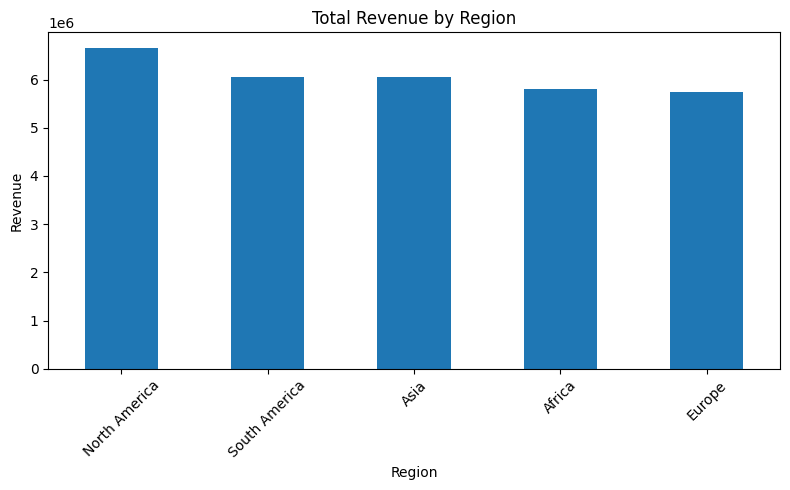

In [56]:
df['Revenue']=df['Quantity']*df['Unit_Price']*(1-df['Discount'])



In [71]:
# Profit
df['Profit'] = df['Revenue'] - df['Cost']

# Month & Year
df['Month']=df['Order_Date'].dt.month
df['Year']=df['Order_Date'].dt.year



In [47]:
#Feature Engineering





# Profit Margin
df['Profit_Margin']=np.where(

    df['Revenue']>0,
    df['Profit']/df['Revenue'],0
)
df.head()


,Order_ID,Order_Date,Region,Product_Category,Product_Name,Quantity,Unit_Price,Discount,Revenue,Cost,Profit,Month,Year,Profit_Margin
0,ORD101084,2023-03-01,North America,Home,Blender,100,454.32,0.1,40888.800,51730.14,-10841.340,3,2023,-0.265142
1,ORD108018,2023-03-09,Europe,Toys,Doll,1,143.51,0.0,143.510,143.02,0.490,3,2023,0.003414
3,ORD104865,2023-05-10,North America,Books,Sci-Fi,50,238.72,0.1,10742.400,9825.43,916.970,5,2023,0.085360
4,ORD101573,2023-02-02,Europe,Home,Lamp,1,392.44,0.1,353.196,321.11,32.086,2,2023,0.090845
5,ORD107094,2023-11-02,Europe,Clothing,Jeans,50,145.53,0.2,5821.200,5915.05,-93.850,11,2023,-0.016122


In [50]:
#Exploratory Data Analysis

revenue_by_region=(
    df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
)

revenue_by_region.apply(lambda x: f"{x:,.0f}")

Region
North America    6,648,442
South America    6,046,873
Asia             6,046,181
Africa           5,813,172
Europe           5,732,556
Name: Revenue, dtype: object

In [63]:
#monthly_sales.head()

top_products = (
df.groupby('Product_Name')['Revenue']
.sum()
.sort_values(ascending=False)
.head(10)
)

top_products



Product_Name
Unknown       2.704414e+06
Board Game    1.656267e+06
Drone         1.576896e+06
Puzzle        1.559046e+06
Smartphone    1.481980e+06
Vacuum        1.461752e+06
Shoes         1.434119e+06
Camera        1.432617e+06
Lamp          1.432096e+06
Laptop        1.425115e+06
Name: Revenue, dtype: float64

In [52]:
## Category-wise Profit Margin (Pivot Table)

category_profit_margin = pd.pivot_table(
df,
values='Profit_Margin',
index='Product_Category',
aggfunc='mean'
).sort_values(by='Profit_Margin', ascending=False)


category_profit_margin

,Profit_Margin
Product_Category,
ELECTRONICS,-0.080043
books,-0.095443
Books,-0.098705
Toys,-0.101733
Home,-0.103239
Electronics,-0.107404
Clothing,-0.109405
Clothng,-0.137416
electronics,-0.141747


In [53]:
#Discount vs Profit Analysis

df['Discount_Bucket'] = pd.cut(
df['Discount'],
bins=[0, 0.10, 0.20, 0.30, 1.0],
labels=['0-10%', '10-20%', '20-30%', '30%+']
)

discount_analysis = (
df.groupby('Discount_Bucket')
.agg(
Total_Revenue=('Revenue', 'sum'),
Total_Profit=('Profit', 'sum'),
Avg_Profit_Margin=('Profit_Margin', 'mean'),
Order_Count=('Order_ID', 'count')
)
)


#discount_analysis


# Identify worst discount level
worst_discount = discount_analysis['Avg_Profit_Margin'].idxmin()
print('Lowest profit margin at discount level:', worst_discount)
#Business Insights
# =========================================
# - Certain regions dominate total revenue
# - Electronics (example) shows higher profit margins
# - Discounts above 20% reduce profitability
# - Small % of products drive majority of revenue

Lowest profit margin at discount level: 20-30%


C:\Users\karishma thakare\AppData\Local\Temp\ipykernel_12016\1070557108.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Discount_Bucket')


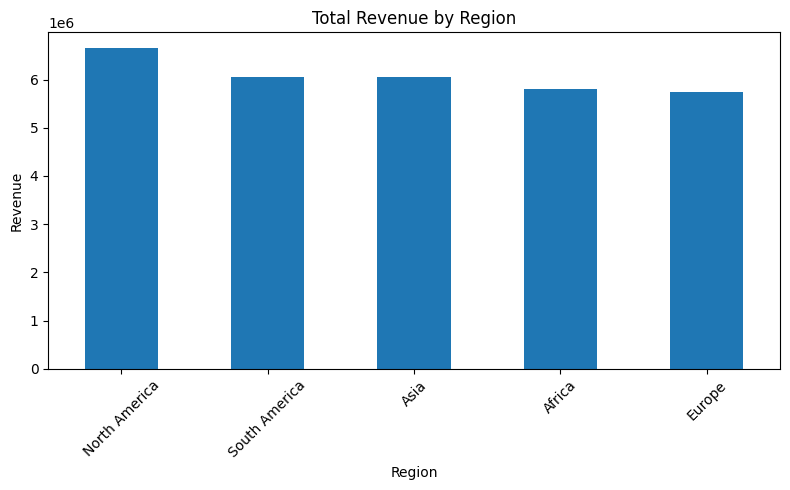

In [61]:
#data visualization

plt.figure()
revenue_by_region.plot(kind='bar')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

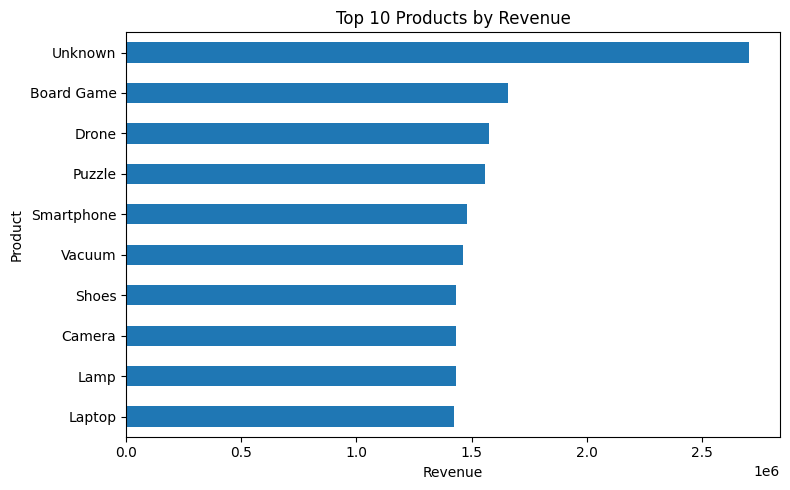

In [62]:
plt.figure()
top_products.plot(kind='barh')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
plt.show()

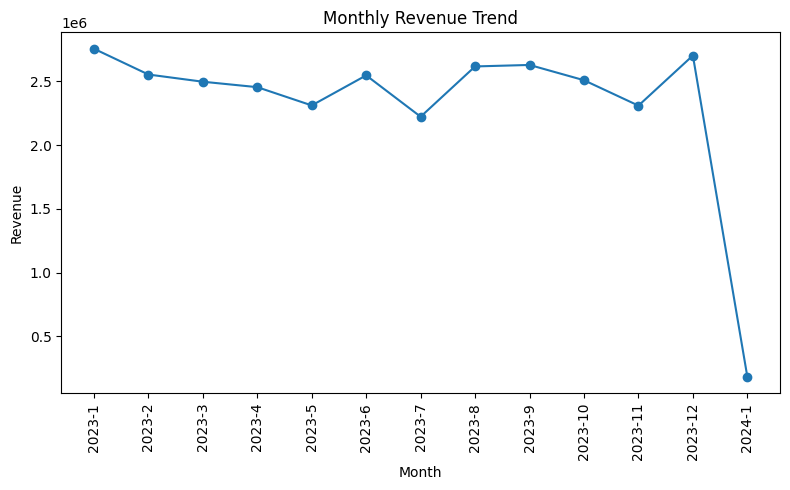

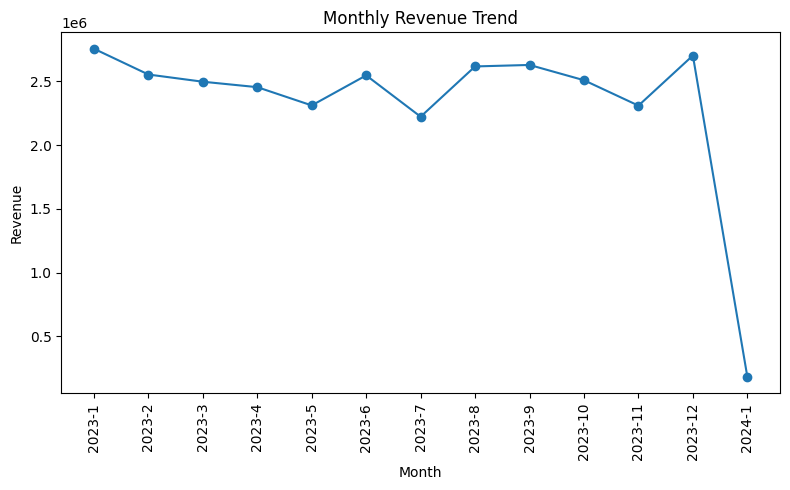

In [72]:

monthly_sales = (
    df.groupby(['Year', 'Month'])['Revenue']
      .sum()
      .reset_index()
)

monthly_sales['Year_Month'] = (
    monthly_sales['Year'].astype(str) + '-' +
    monthly_sales['Month'].astype(str)
)

plt.figure()
plt.plot(monthly_sales['Year_Month'], monthly_sales['Revenue'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


plt.figure()
plt.plot(monthly_sales['Year_Month'], monthly_sales['Revenue'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

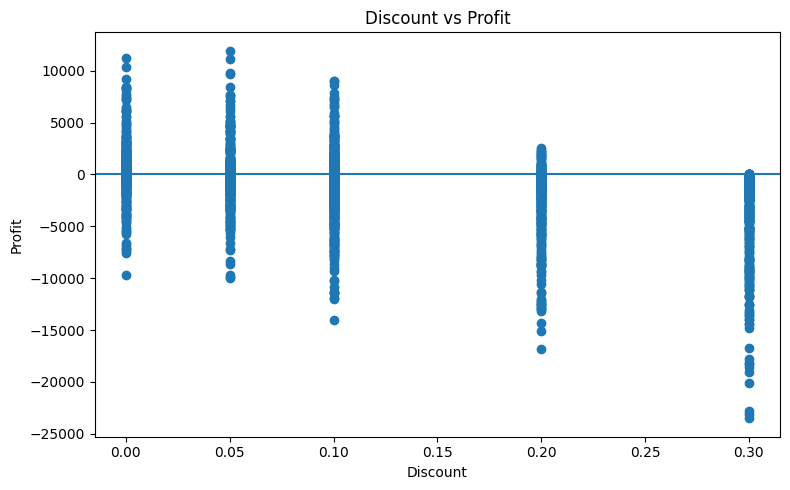

In [65]:
#Discount vs Profit (Scatter Plot)

plt.figure()
plt.scatter(df['Discount'], df['Profit'])
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0)  # zero profit reference
plt.tight_layout()
plt.show()

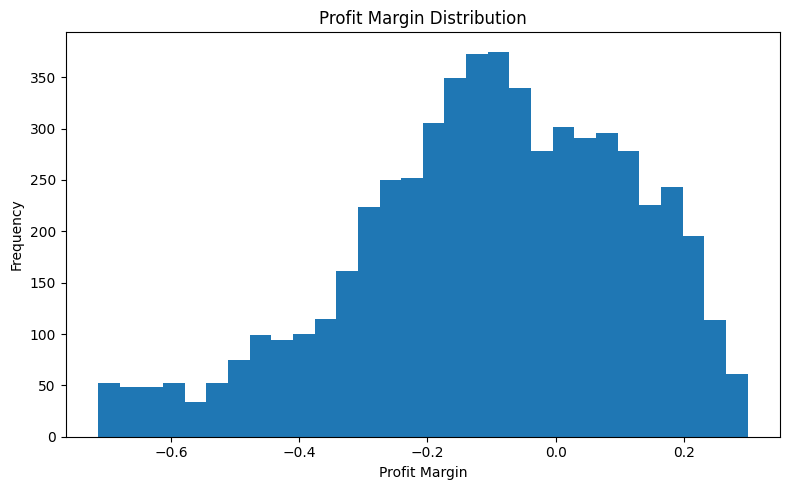

In [68]:
#Profit Margin Distribution (Histogram)

plt.figure()
plt.hist(df['Profit_Margin'], bins=30)
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

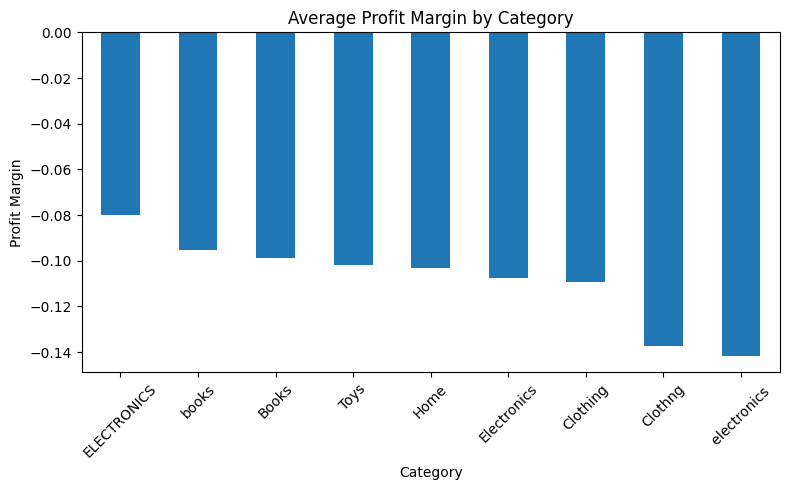

In [69]:
#Category-wise Average Profit Margin (Bar Chart)

category_margin = (
    df.groupby('Product_Category')['Profit_Margin']
      .mean()
      .sort_values(ascending=False)
)

plt.figure()
category_margin.plot(kind='bar')
plt.title('Average Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
#“Used Matplotlib to visualize revenue distribution, trends, product performance, and discount impact to support data-driven business insights

# Bar chart – revenue by region
# Line chart – monthly trend
#Horizontal bar – top products
#Scatter plot – discount vs profit
#Histogram – profit margin